# Part I - Used Car Data Exploration
## by Theresa Sunday

## Introduction
An automobile company XYZ from India aspires to enter the Indian used-car market by setting up their company locally to give competition to their counterparts.
Based on various market surveys, the consulting firm has gathered a large dataset of different types of used cars across the market.

Data Dictionary:

>Sales_ID (Sales ID)
>name (Name of the used car)
>year (Year of the car purchase)
>selling_price (Current selling price for used car)
>km_driven (Total km driven)
>Region (Region where it is used)
>State or Province (State or Province where it is used)
>City (City where it is used)
>fuel (Fuel type)
>seller_type (Who is selling the car)
>transmission (Transmission type of the car)
>owner (Owner type)
>mileage (Mileage of the car)
>engine (engine power)
>max_power (max power)
>seats (Number of seats)
>sold (used car sold or not)

This dataset was gotten from Kaggle.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#loading the dataset
data=pd.read_csv('UserCarData.csv')

data.sample()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
3870,3991,Maruti,2017,340000,52412,Central,Illinois,Galesburg,Petrol,Dealer,Manual,First_Owner,18.9,998,67.1,90Nm@ 3500rpm,5,N


In [3]:
#getting general overview of data
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns")

print(data.isnull().sum())



The data has 7906 rows and 18 columns
Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64


In [4]:
data.duplicated().sum()

0

In [5]:
print(data.dtypes)

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
torque                object
seats                  int64
sold                  object
dtype: object


In [6]:

data['Sales_ID']=data['Sales_ID'].astype('object')

In [7]:
target=['sold','selling_price']
categorical_feat=[]
numerical_feat=[]
for cols in data.drop(columns=['sold','selling_price']).columns:
    if data[cols].nunique()<40 :
        categorical_feat.append(cols)
    elif data[cols].dtypes==object:
        categorical_feat.append(cols)
    elif data[cols].dtypes== 'int64' or data[cols].dtypes== "float64":
        numerical_feat.append(cols)
        

In [8]:
print(f" The categorical features in the dataset are: \n {categorical_feat}")

print(f" The numerical features in the dataset are: \n {numerical_feat}")

print(f" The target column in the dataset is : \n [{target}]")

 The categorical features in the dataset are: 
 ['Sales_ID', 'name', 'year', 'Region', 'State or Province', 'City', 'fuel', 'seller_type', 'transmission', 'owner', 'torque', 'seats']
 The numerical features in the dataset are: 
 ['km_driven', 'mileage', 'engine', 'max_power']
 The target column in the dataset is : 
 [['sold', 'selling_price']]


In [9]:
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


### What is the structure of your dataset?

> There are 7906 rows and 18 columns in the dataset. Most of the variables are categorical in nature with 'selling_price', 'km_driven', 'mileage', 'engine' and 'max_power' columns as numerical.

### What is/are the main feature(s) of interest in your dataset?

> The main features and target of the dataset is the 'sold' and 'selling_price' column which tells us whether a used car is sold or not and its selling price respectively.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>   I expect that fuel, Region and year will have an effect in a car selling or not.

## Univariate Exploration

> In this section, individual variables distribution will be investigated.


I will start by plotting the distribution of the main columns of interest

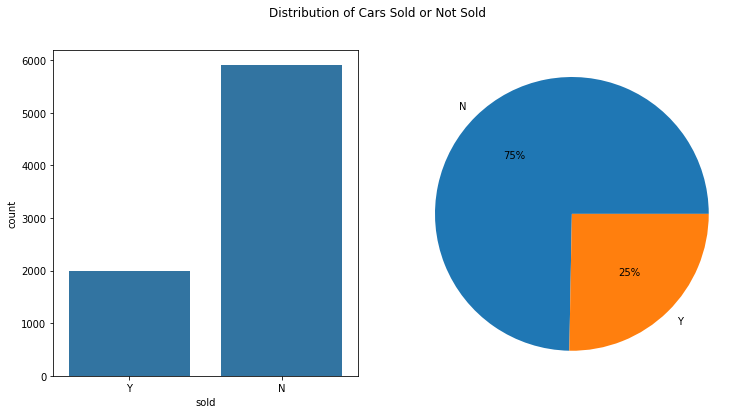

In [10]:
base_color=sns.color_palette()[0]
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
sns.countplot(data=data, x='sold',color=base_color)
plt.suptitle("Distribution of Cars Sold or Not Sold")

plt.subplot(1,2,2)
sold_count=data.sold.value_counts(normalize=True)
plt.pie(sold_count,labels=sold_count.index ,autopct='%.0f%%');
plt.axis('square');

75% of the cars in the dataset have not been sold with only 25% sold. The majority class seems to be 'N' accounting for cars that have not been sold.

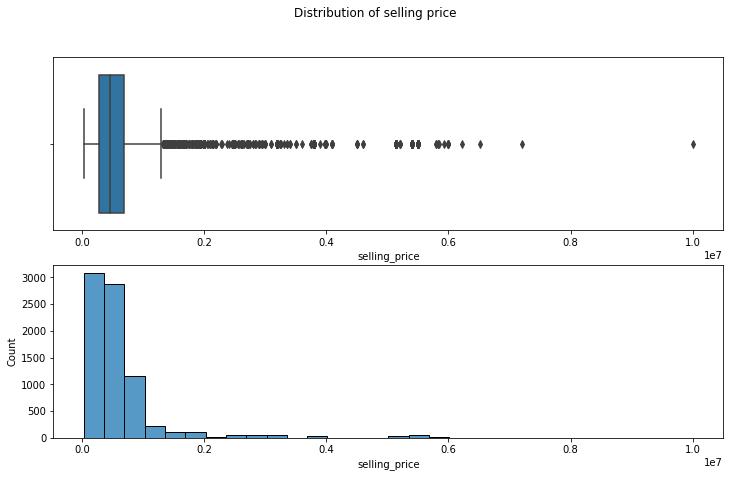

In [11]:
fig,ax=plt.subplots(nrows=2,figsize=[12,7])
sns.boxplot(data=data,x='selling_price',ax=ax[0])
sns.histplot(data=data, x='selling_price',bins=30,ax=ax[1])
plt.suptitle('Distribution of selling price ');

The distribution shows a lot of outliers in the selling_price column which needs to be dealt with to get better data analysis.

In [12]:
data['selling_price'].describe()

count    7.906000e+03
mean     6.498137e+05
std      8.135827e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.900000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [13]:
#removing outliers in the selling_price column
Q1 = data['selling_price'].quantile(0.25)
Q3 = data['selling_price'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['selling_price'] < (Q1 - 1.5 * IQR)) |(data['selling_price']> (Q3 + 1.5 * IQR)))]

In [14]:
data.shape

(7308, 18)

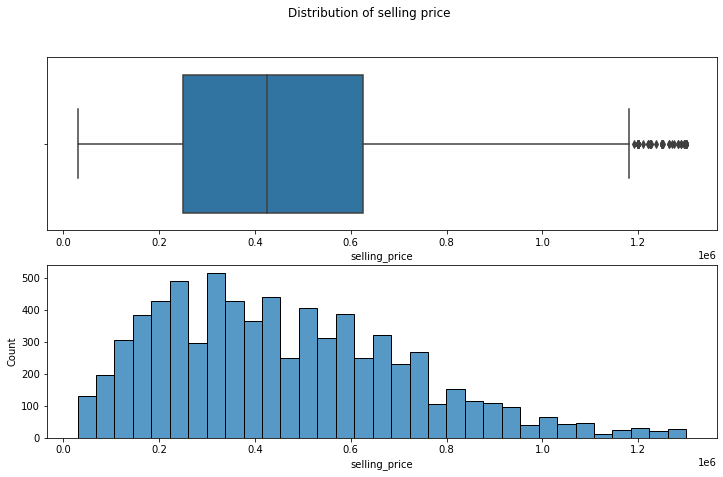

In [15]:
fig,ax=plt.subplots(nrows=2,figsize=[12,7])
sns.boxplot(data=data,x='selling_price',ax=ax[0])
sns.histplot(data=data, x='selling_price',ax=ax[1])
plt.suptitle('Distribution of selling price ');

This is much better !

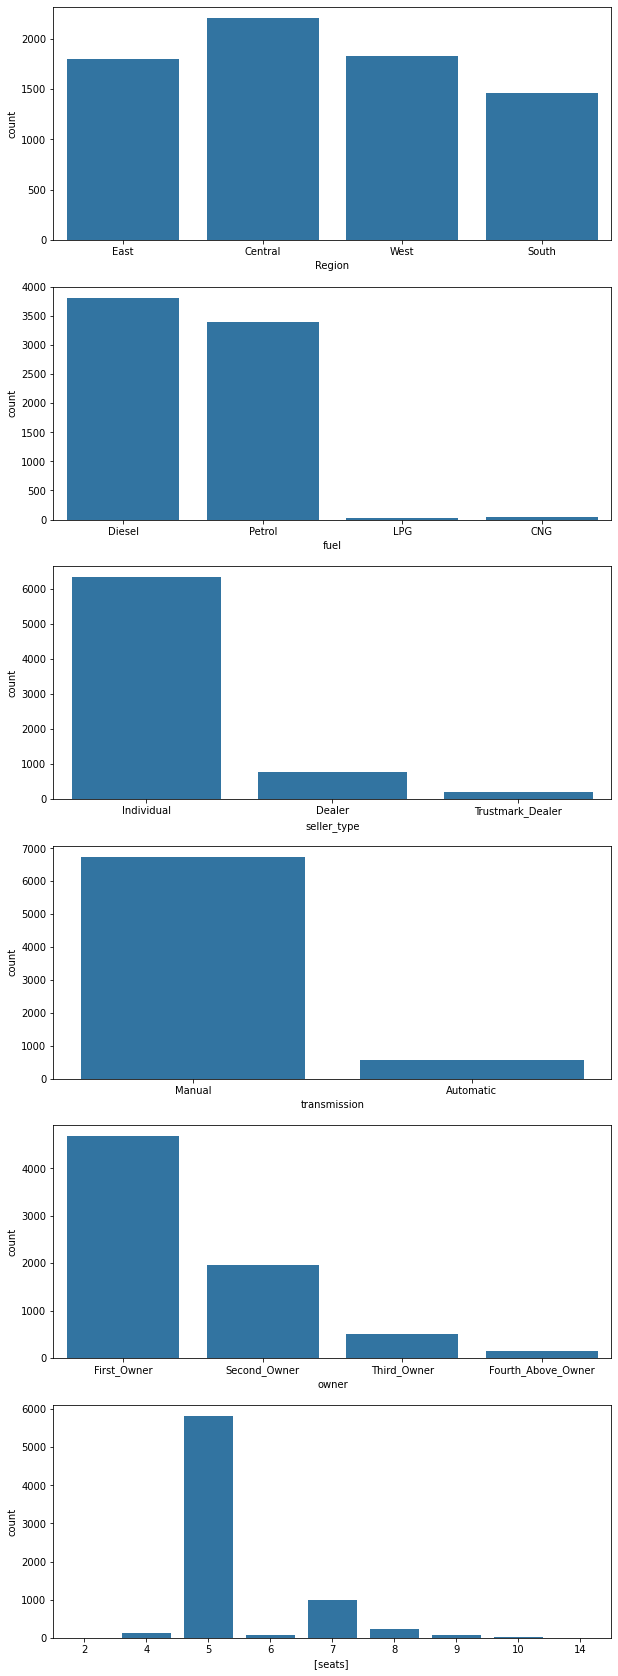

In [16]:
#exploring the categorical features with less than 10 unique variables
cat_feat=[ 'Region', 'fuel', 'seller_type', 'transmission', 'owner',  'seats']
fig,ax=plt.subplots(nrows=6,figsize=[10,30])
ax1=0
for col in cat_feat:
    sns.countplot(data=data,x=col,color=base_color,ax=ax[ax1])
    plt.xlabel(f"[{col}] ")
    ax1+=1


The dataset shows interesting distribution of columns with less than 10 unique values. The dataset seems to contain more Central Region cars , higher amount of Diesel and Petrol operated cars as compared to LPG and CNG , Sellers that are mostly individuals , more manually operated cars than automatic cars , most first owner cars and a lot of 5 seater cars


The remaining categorical features will be visualized below

In [17]:
def show(col):
    plt.figure(figsize=[12,6])
    d_t=data[col].value_counts().head(10)
    d_t.plot(kind='bar')

    plt.xlabel(f'{col}')
    plt.xticks(rotation=45)
    plt.title(f"Top 10 highest count of {col} in the dataset")

    plt.show()

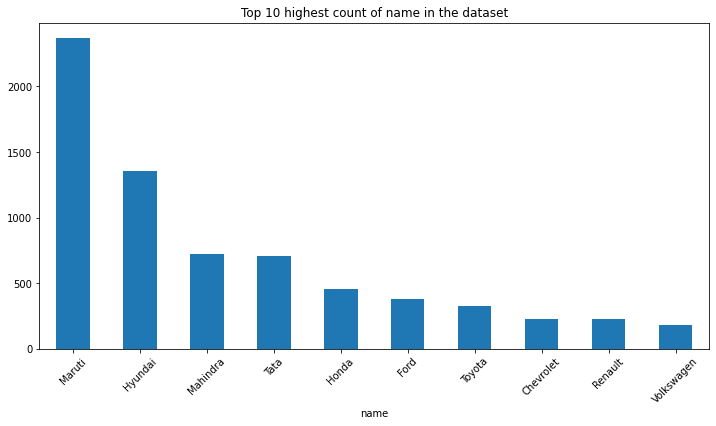

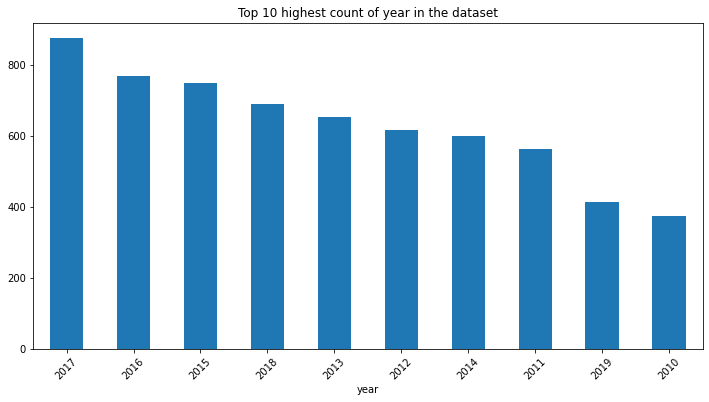

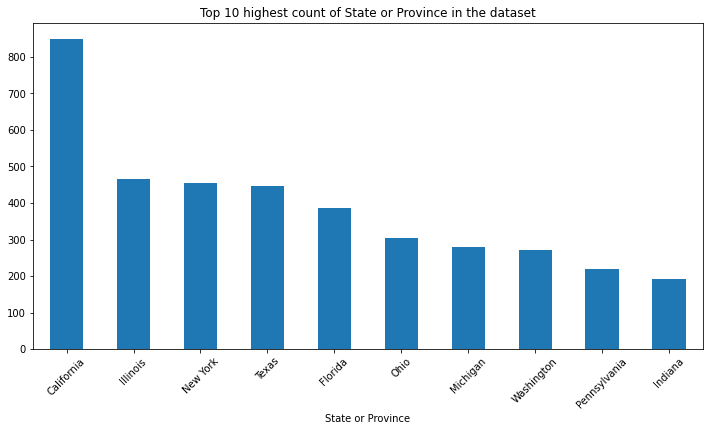

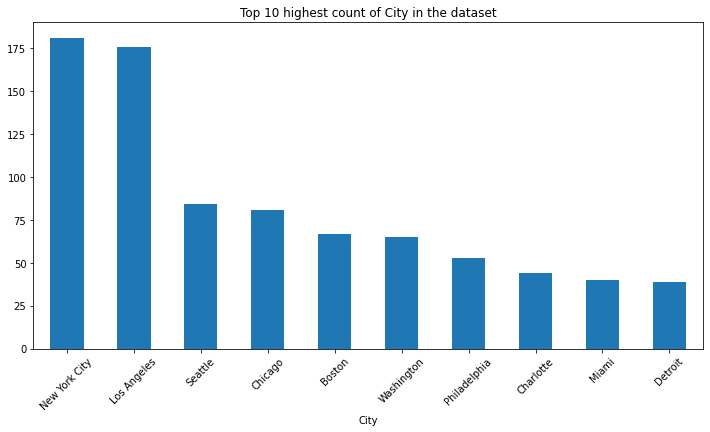

In [18]:
cat_rem=['name', 'year', 'State or Province', 'City']
for col in cat_rem:
    show(col)

The above visualizations show the top 10 highest counts in name,year,city,state in the dataset.
Maruti,Hyundai and Mahindra are our top 3 highest name counts in the dataset.
2017,2015 and 2018 seems to be the year with the highest number of car purchases in the dataset.
Carlifornia, Illinois and New York is the state where most of the cars are used.
NewYork City , LA and Seattle is the city where most of the cars are used.


Next, is the individual visualization of our numerical variables

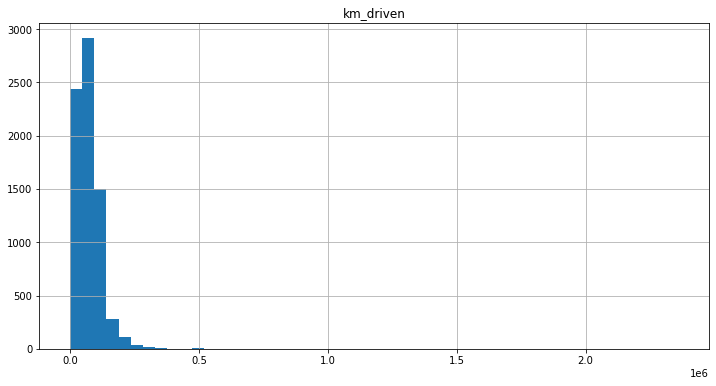

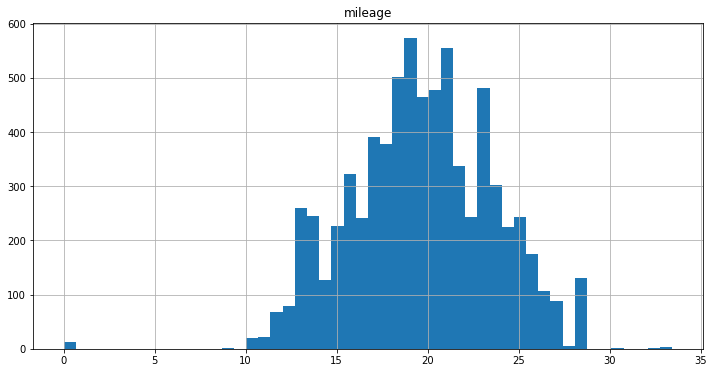

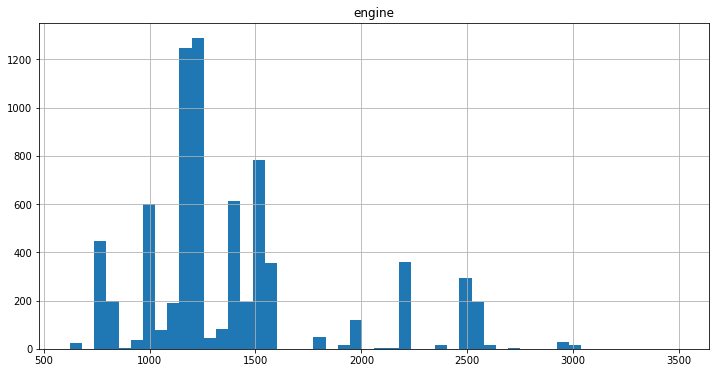

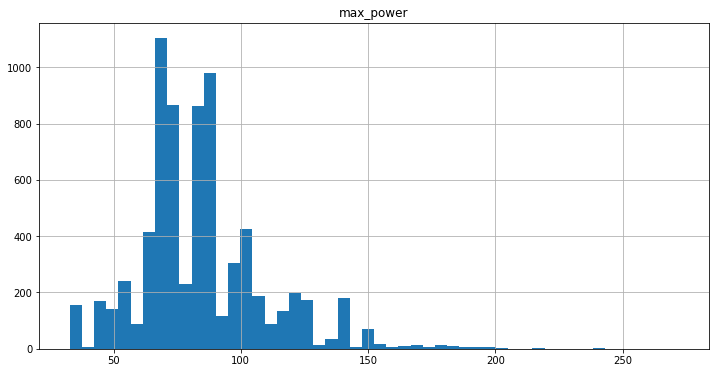

In [19]:
for cols in numerical_feat:

    
    data.hist(column=cols,figsize=[12,6],bins=50)
  
    plt.show()

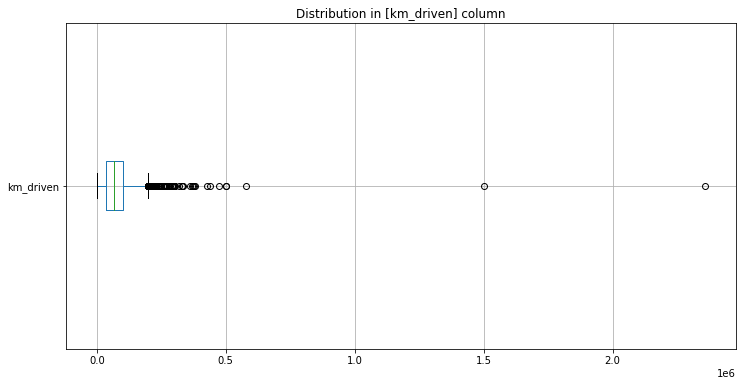

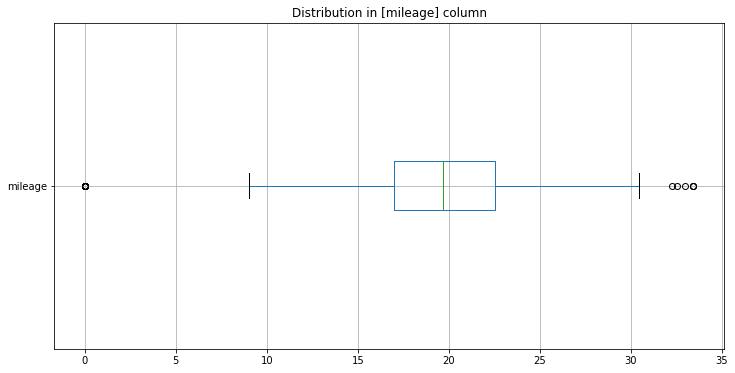

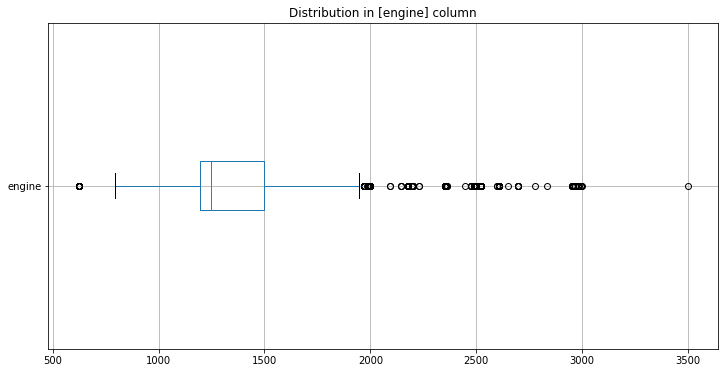

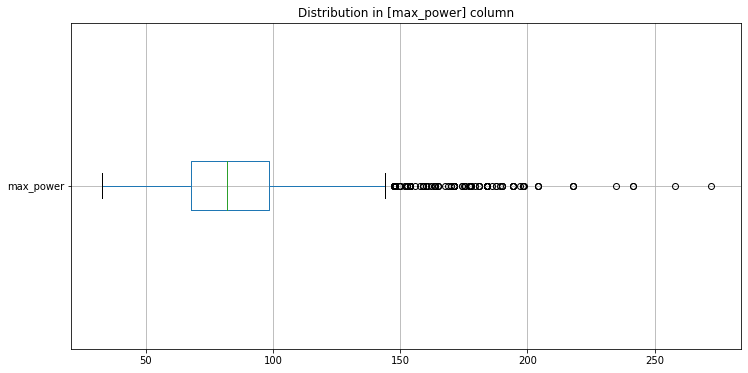

In [20]:
for cols in numerical_feat:

    plt.figure(figsize=[12,6])
    data.boxplot(column=cols,vert=False)
    plt.title(f"Distribution in [{cols}] column")
  

The numerical variables happen to have most of its distributions rightly skewed which shows a lot of outliers that might affect our data exploration.

In [21]:
for col in numerical_feat:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    data = data[~((data[col] < (q1 - 1.5 * iqr)) |(data[col]> (q3 + 1.5 * iqr)))]
    print(data.shape)

(7151, 18)
(7132, 18)
(6155, 18)
(5877, 18)


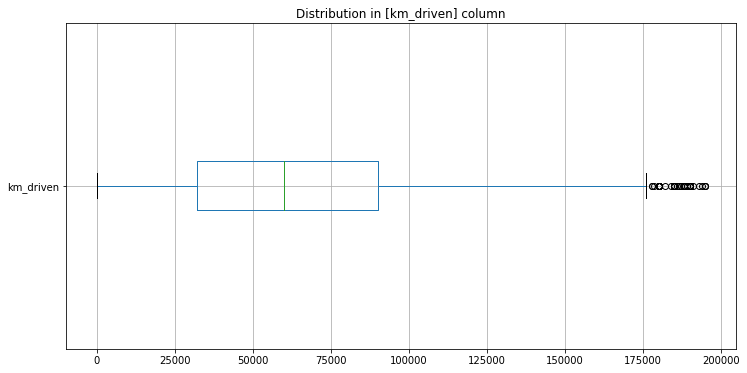

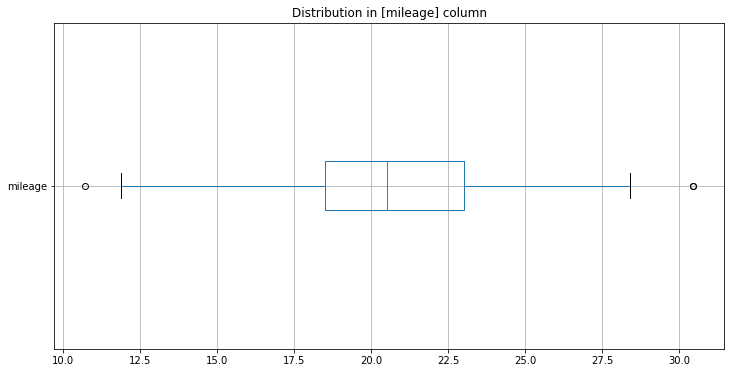

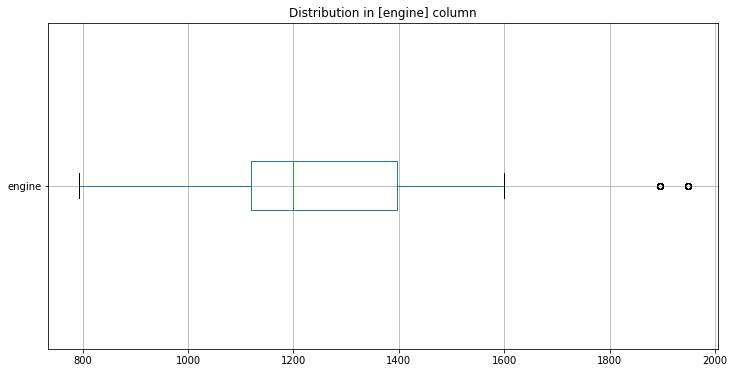

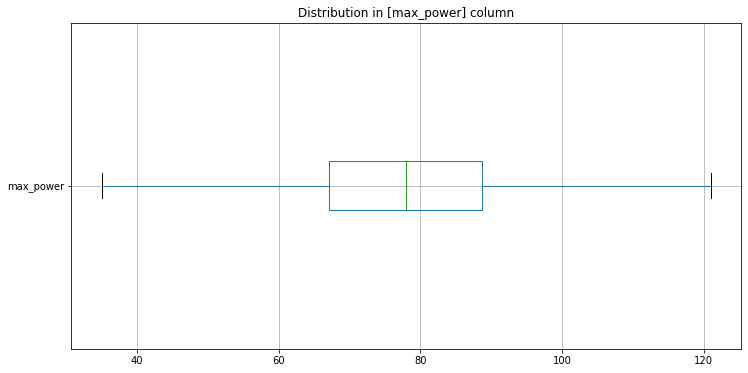

In [22]:
for cols in numerical_feat:

    plt.figure(figsize=[12,6])
    data.boxplot(column=cols,vert=False)
    plt.title(f"Distribution in [{cols}] column")
  

The numerical features distribution look much better after the removal of outliers.

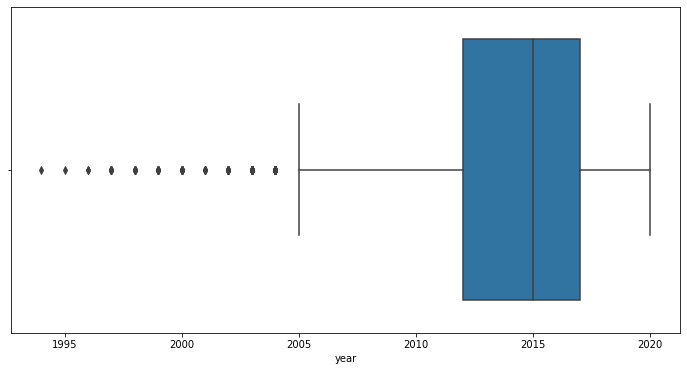

In [23]:
plt.figure(figsize=[12,6])
sns.boxplot(data=data,x='year');

Interesting to see that we have cars that have been purchased since 1994 till 2020!



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable of interest which is 'sold' is categorical in this sense with 75% of the cars still not sold and 25% sold. The majority class happens to be the cars still not sold . The other variable of interest which is 'selling_price' had very skewed distribution to the right which showed presence of outliers that might produce bad analysis. The selling_price column was transformed with the use of Inter Quartile Range and conditionals to remove outliers that might exist in that column.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The numerical variables showed interesting distributions with most of them rightly skewed. To tidy and adjust these numerical varaiables, I used Inter Quartile Range and conditionals to remove outliers.

## Bivariate Exploration

> In this section, relationships between pairs of variables will be investigated.

First, I will be checking for correlations in the dataset.

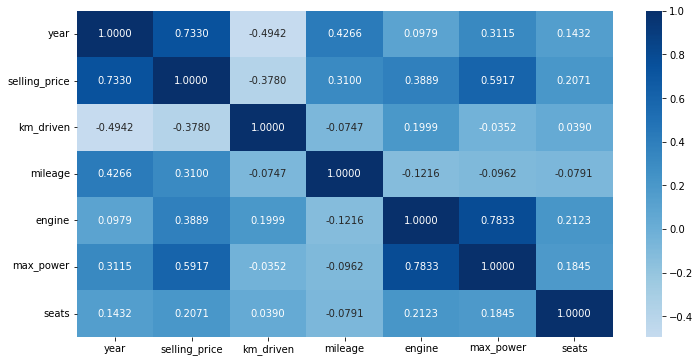

In [24]:
plt.figure(figsize = [12, 6])
sns.heatmap(data.corr(),annot=True,cmap='Blues',fmt='.4f',center=0);

<Figure size 3600x1440 with 0 Axes>

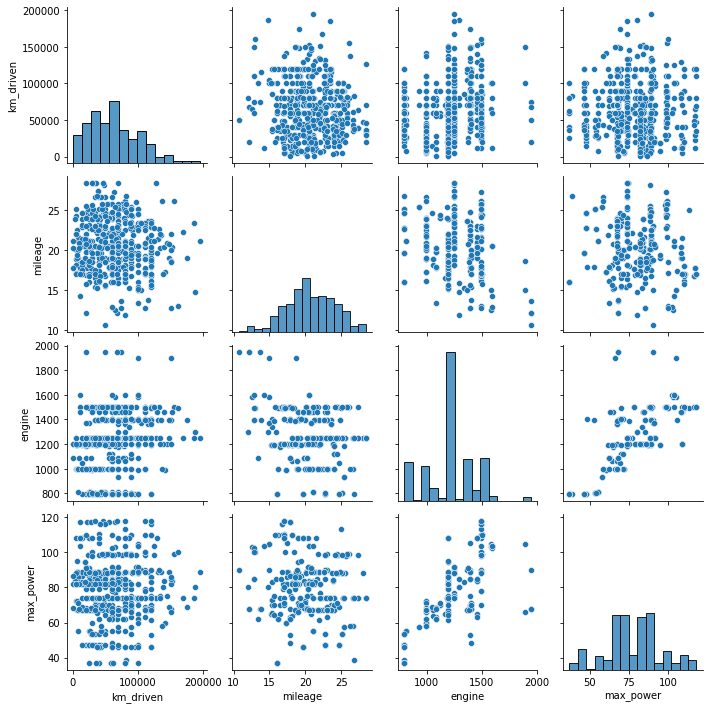

In [25]:
data_sample=data.sample(n=500,replace=False)
plt.figure(figsize=[50,20])
sns.pairplot(data_sample[numerical_feat]);

The correlations are really interesting to see!
Really high correlation between selling price and max power,
High Correlation between year and selling price,
High correlation between engine and max power.

Further analysis of these correlations might help us with some knowledge.

Next, we will explore these relationships

In [26]:
def reg(x,y):
    plt.figure(figsize=[12,6])
    sns.regplot(data=data,x=x,y=y,scatter_kws={'alpha':0.5},fit_reg=False)
    plt.title(f"Correlation between {x} and {y} is {data[x].corr(data[y]).round(4)}")
    plt.show()

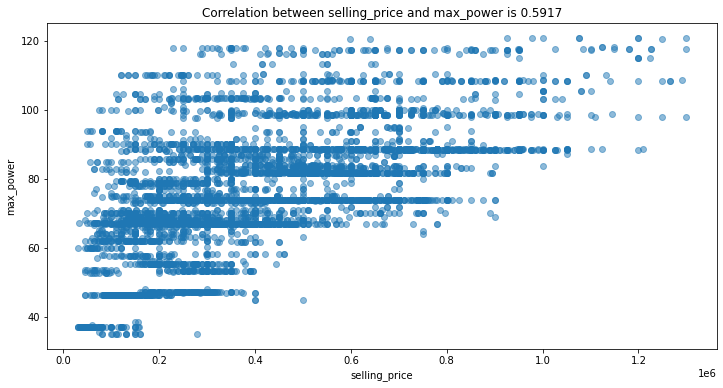

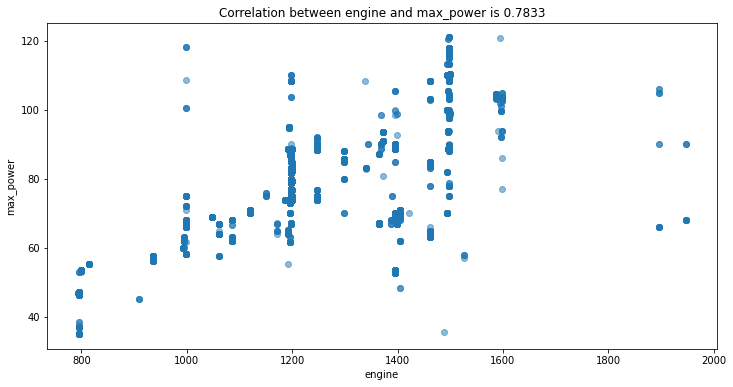

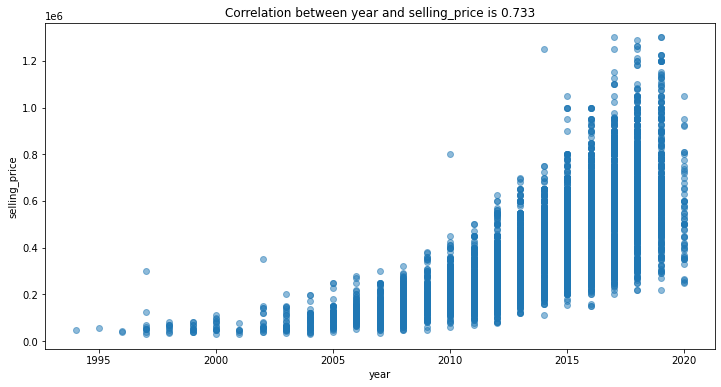

In [27]:
reg('selling_price','max_power')
reg('engine','max_power')
reg('year','selling_price')

A positive correlation between selling price and max_power which is not surprising as more engine powers generally increase the value of a car.
Not surprising to see a high positive correlation between engine and max power.


Next, we will be exploring numerical features against categorical features

<Figure size 720x720 with 0 Axes>

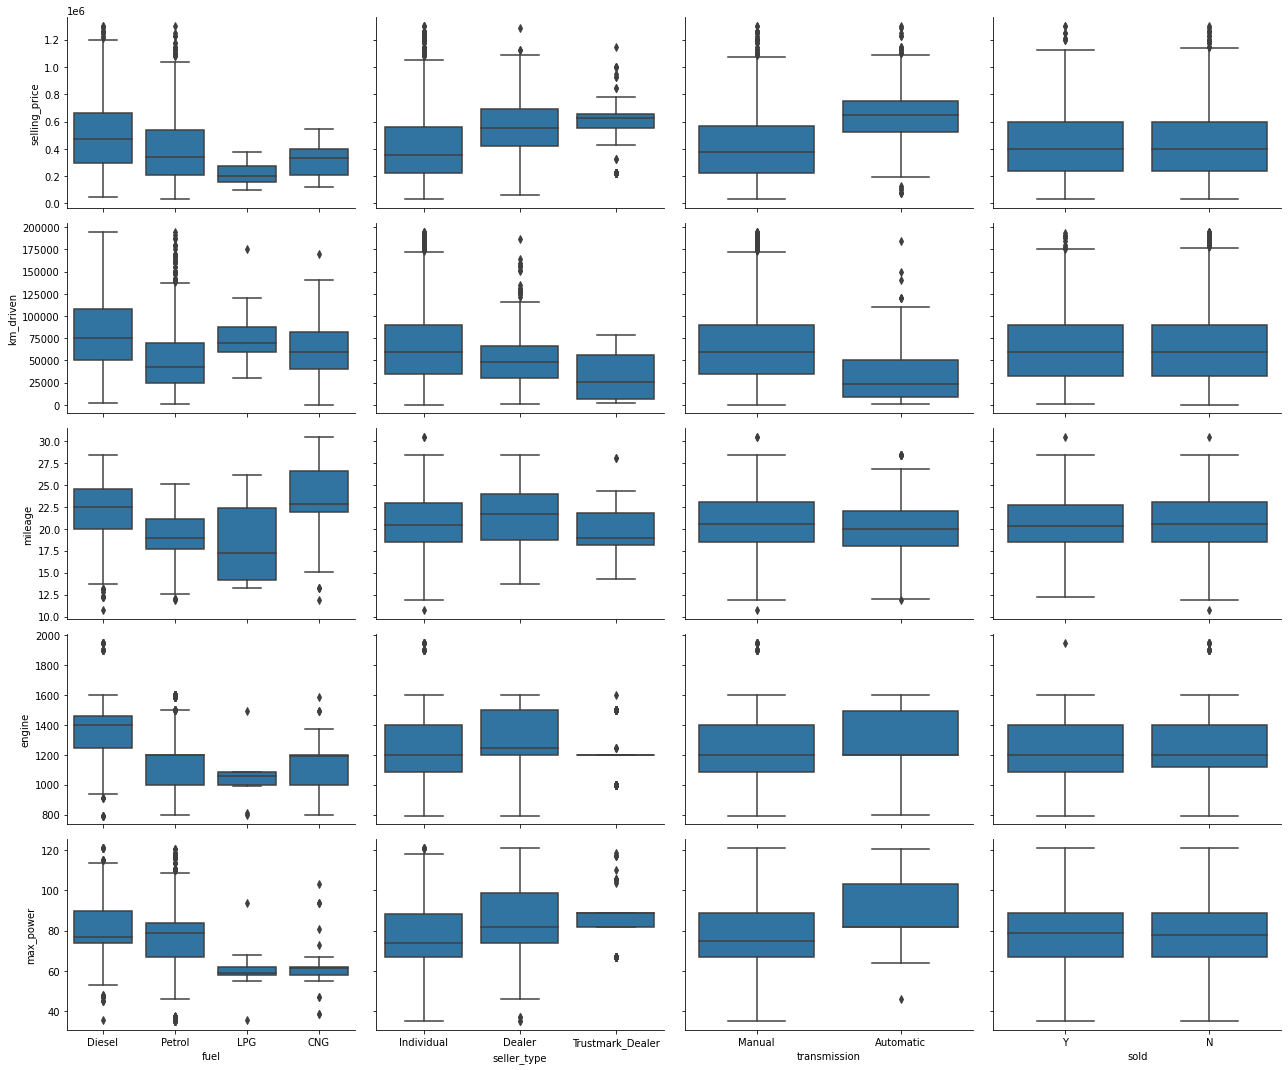

In [28]:
features_lessunique=[ 'fuel', 'seller_type', 'transmission','sold']
ax=plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = data, y_vars = ['selling_price','km_driven','mileage', 'engine', 'max_power'], x_vars = features_lessunique,
                height = 3, aspect = 1.5)
g.map(sns.boxplot,color=sns.color_palette()[0])
plt.show();

<Figure size 720x720 with 0 Axes>

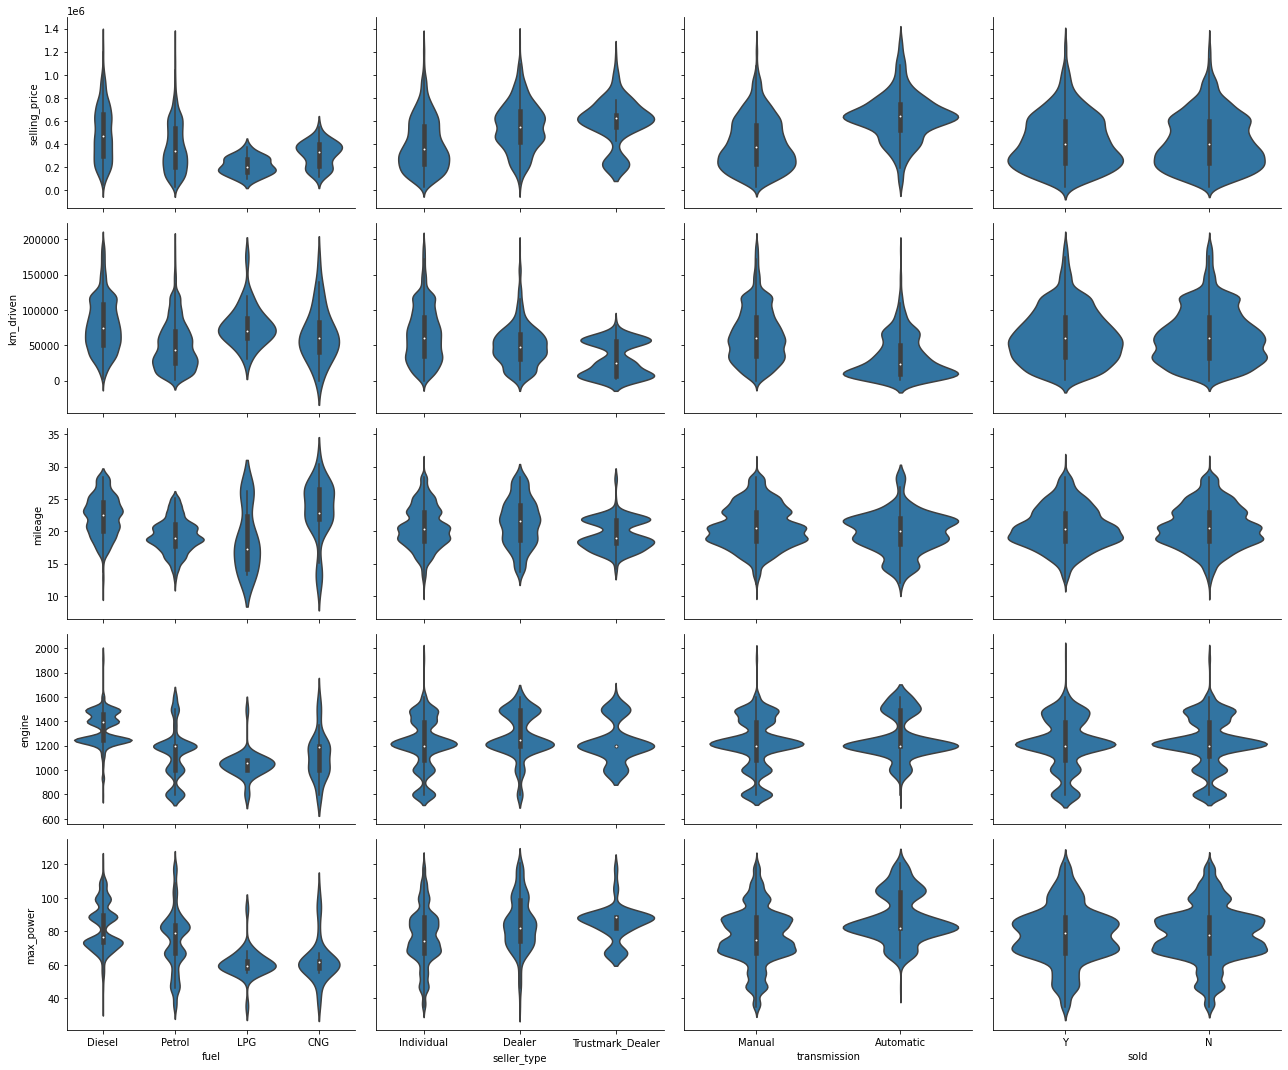

In [29]:
features_lessunique=[ 'fuel', 'seller_type', 'transmission','sold']
ax=plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = data, y_vars = ['selling_price','km_driven','mileage', 'engine', 'max_power'], x_vars = features_lessunique,
                height = 3, aspect = 1.5)
g.map(sns.violinplot,color=sns.color_palette()[0])
plt.show();

Interesting to note that Automatic cars had higher max power,engine and selling price than manual cars.

Next, we will see the relationship between selling price and other variables

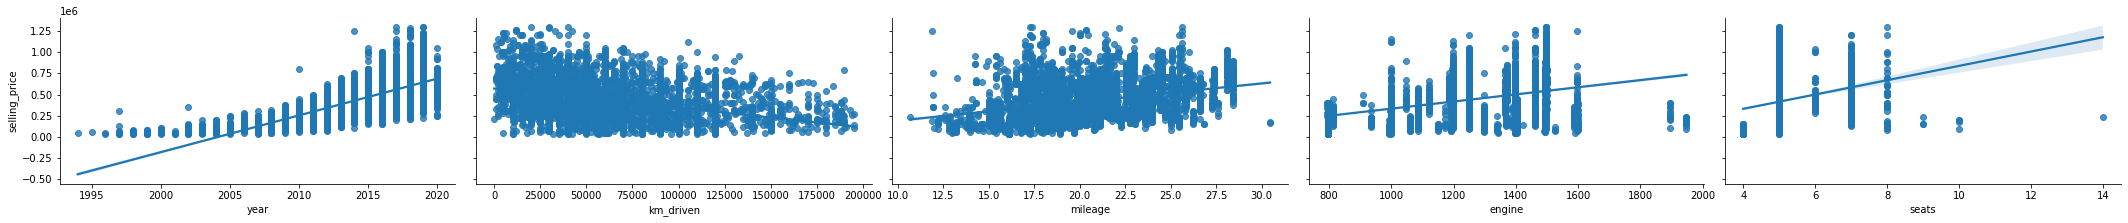

In [30]:
features=[ 'year', 'km_driven', 'mileage', 'engine', 'seats']



g = sns.PairGrid(data = data, y_vars = ['selling_price'], x_vars = features,
                height = 3, aspect = 2)
g.map(sns.regplot,color=sns.color_palette()[0])
plt.show();

Selling price of vehicles increased as years and engine powers increased !

Exploring relationships between target['sold'] variable and other features

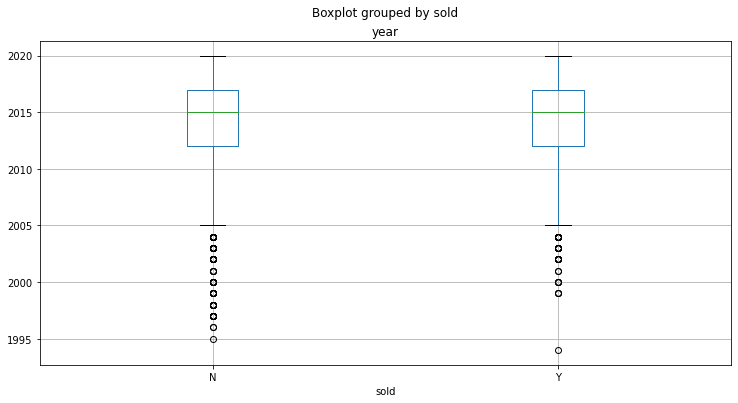

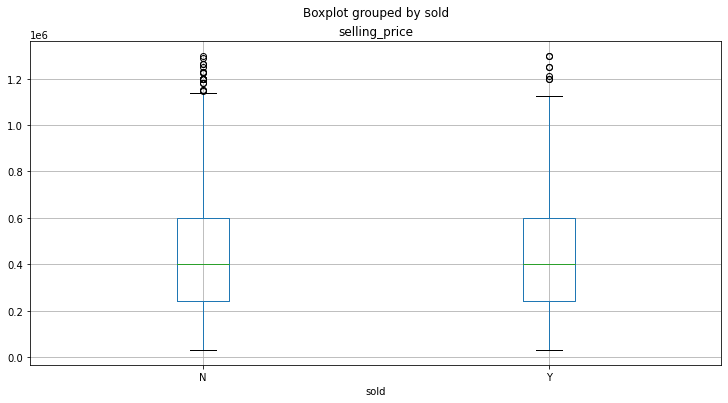

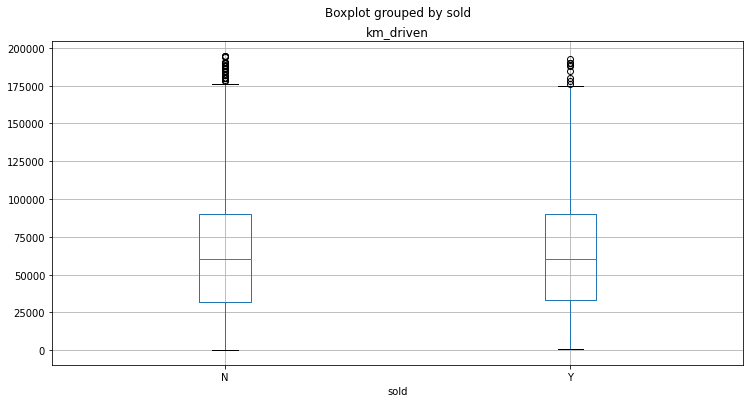

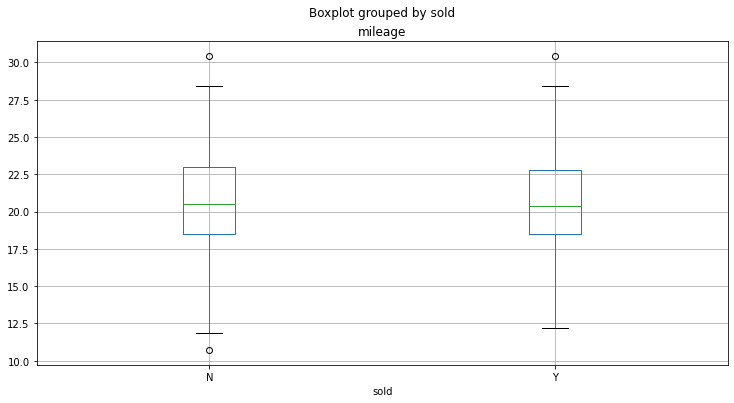

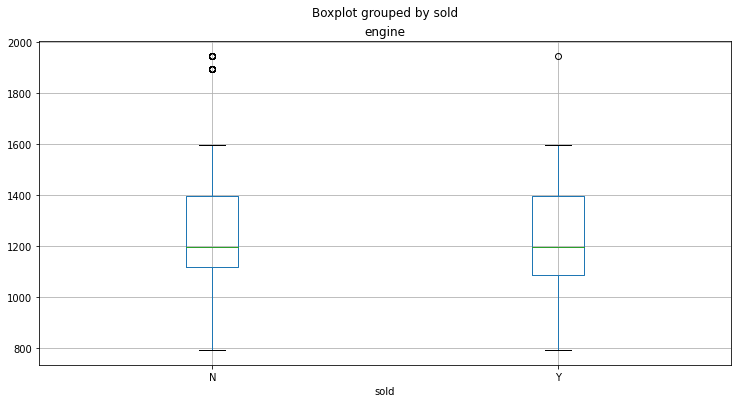

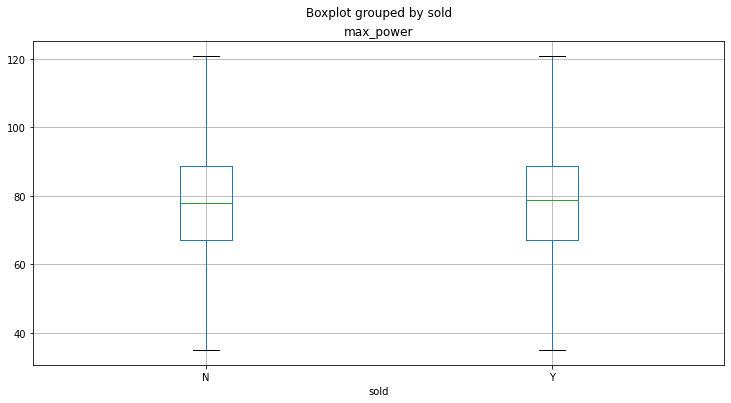

In [31]:
features=['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power']


for col in features: 
    data.boxplot(column=col,by='sold',figsize=[12,6])

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Cars sold tended to have lower selling prices than cars that have not been sold. Higher Km_driven tended to be a characteristic of car not sold yet.Interesting to note how automatic cars had higher selling prices,selling price of vehicles increased as years and engine powers increased.A positive correlation between selling price and max_power which is not surprising as more engine powers generally increase the value of a car.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>One interesting relationship is the high positive correlation between engine and max power. Cars with higher km_driven and higher mileage tended to be charactersistics of cars not yet sold. This is a valid point and according to webuycar.com ,the car with higher mileage will have a lower resale value.Diesel and Petrol cars had better engine powers than LPG and CNG fueled cars.

## Multivariate Exploration


In [32]:
palette=['darkorange','steelblue']
def barr(x,y,z,figsize,palette):
    plt.figure(figsize=figsize)
    sns.barplot(data=data,x=x,y=y,hue=z,palette=palette)
    plt.title(f"Distribution of [{z}] in [{x}] and [{y}]")
    

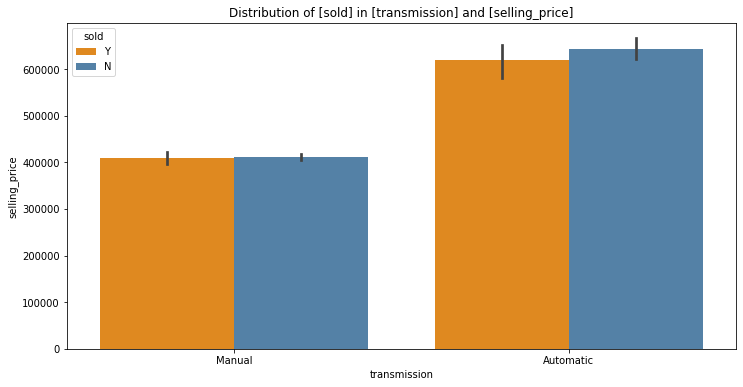

In [33]:
barr('transmission','selling_price','sold',[12,6],palette)

Automatic cars had higher selling price and the distribution of sold automatic cars were considerably expensive to that of not sold automatic cars.
similarly,manual cars tended to be less expensive than automatic cars with almost equal distribution in the cars sold and not sold.

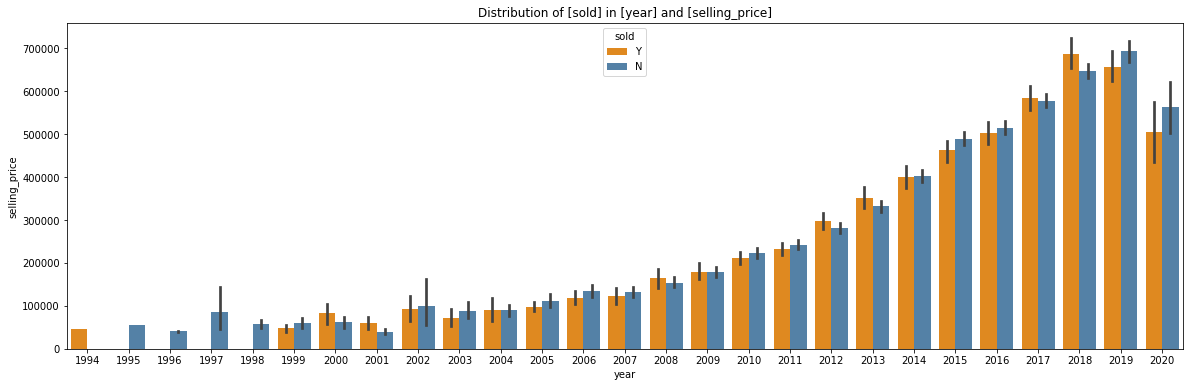

In [34]:

barr('year','selling_price','sold',[20,6],palette)

Selling prices increased across the years..
1994 cars were all sold.
cars purchased from 1995 to 1998 had a hard time being sold.

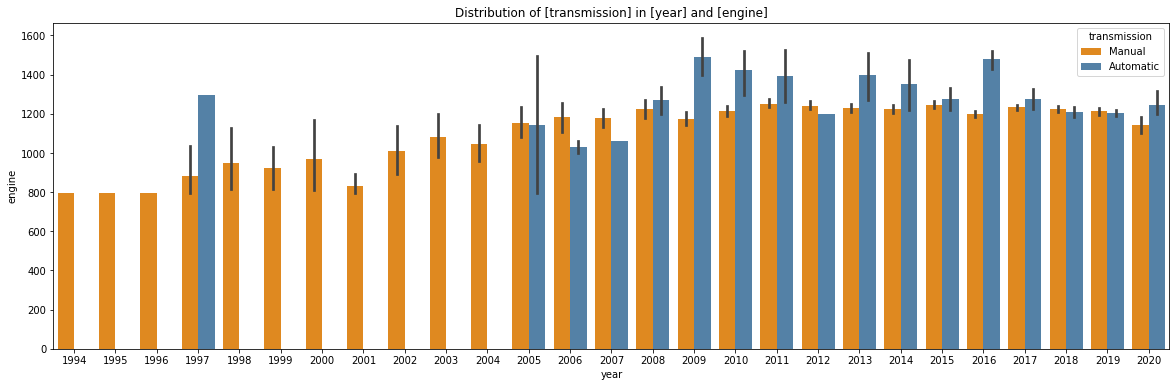

In [35]:
barr('year','engine','transmission',[20,6],palette)

In [36]:
data[data['year']==2020].shape[0]

57

Over the years, selling price increased but we notice a dip in 2020 which can be accounted for by the number of cars purchased in 2020 in the dataset.

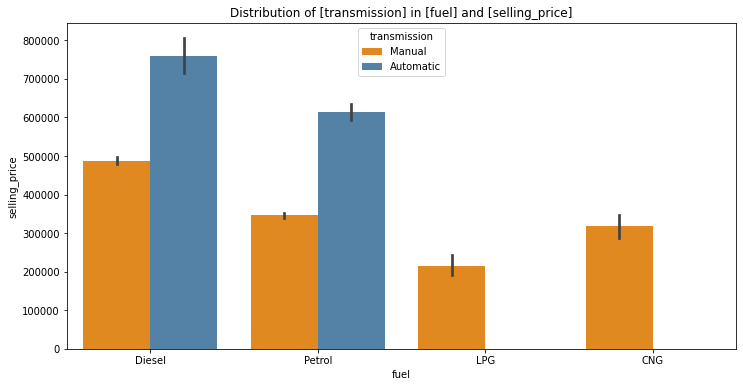

In [37]:
barr("fuel","selling_price","transmission",[12,6],palette=palette)


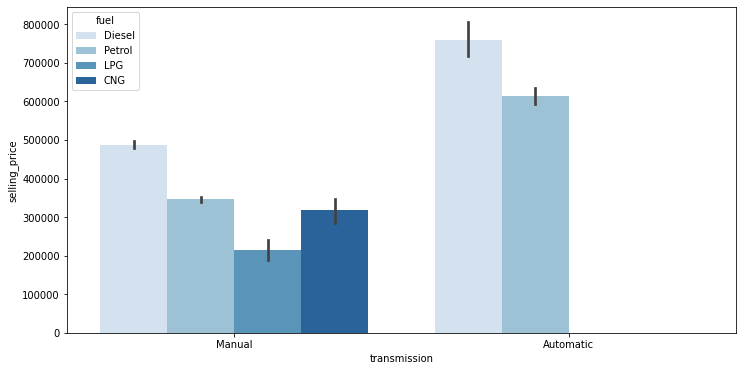

In [38]:
plt.figure(figsize=[12,6])
sns.barplot(data=data,x="transmission",y="selling_price",hue="fuel",palette="Blues");

Diesel and petrol operated cars had more automatic cars than manual cars, LPG and CNG operated cars had only manual cars in the dataset.
Diesel Operated cars tended to be more expensive than other type of fuel operated cars.

In [39]:
def line(x,y,z):
    plt.figure(figsize=[12,6])
    sns.lineplot(data=data,x=x,y=y,hue=z,palette=palette)
    plt.title(f"Distribution of [{z}] in [{x}] and [{y}]")
    

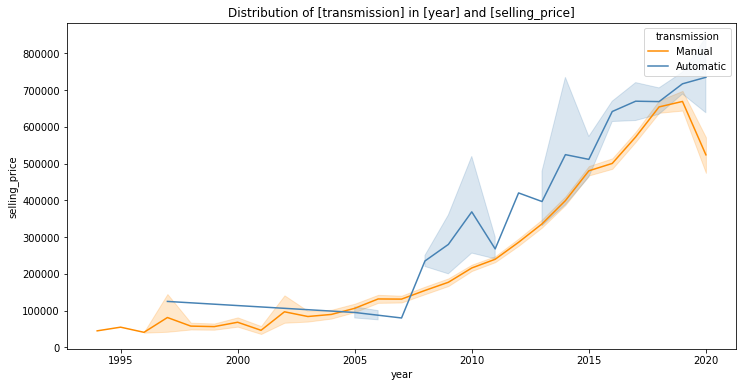

In [40]:
line('year','selling_price','transmission')

Both automatic and manual cars selling price increased over the years with a dip in 2020.

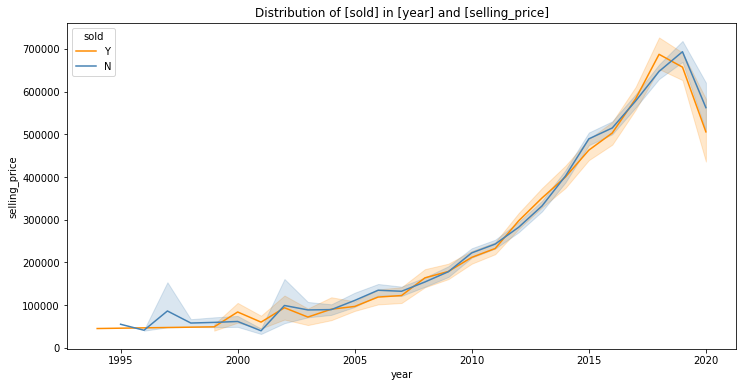

In [41]:
line('year','selling_price','sold')

Based on the selling price and years, cars sold or not had almost similar distributions across the years.

In [42]:
def scatter(x,y,z):
    plt.figure(figsize=[12,6])
    sns.scatterplot(data=data,x=x,y=y,hue=z,palette=palette)
    plt.title(f"Distribution of [{z}] in [{x}] and [{y}]")

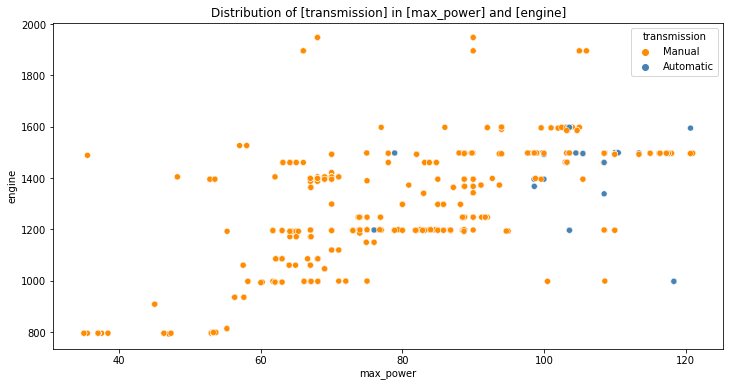

In [43]:
scatter('max_power','engine','transmission')

Automatic cars had higher max_power and engine power than manual cars from the scatter plot above.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is interesting to note how important a car's mileage is to its value in the car market.From the visualizations, we can see that cars with very high mileage were not sold. Engine power and max engine power is a great characteristic of very expensive cars. Automatic cars , especially diesel operated automatic cars tended to be very expensive.

### Were there any interesting or surprising interactions between features?
> The max engine power and engine power of automatic cars were very high if compared to that of manual cars.There is an increase in amount of automatic cars purchased from 2005 with blank years being 1998-2004.The blank years suggest that no automatic cars in the dataset was purchased in that period.